In [8]:
# Generic imports for almost all Python work
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import io
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
data_path = "./data"
graph_path = "/Users/shaoleili/Downloads/mweber_constrainer_images"

In [3]:
with io.open(data_path + "/labels_5872.pkl","rb") as file:
    label = pickle.load(file,encoding="latin1")
file.close()

In [4]:
branch_names = ['x','y','z','e_charge','e_scint']
df = pd.DataFrame(label, columns =branch_names)

In [5]:
n_evts_target = 10000

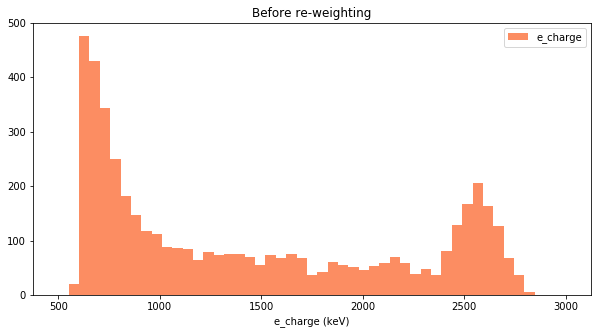

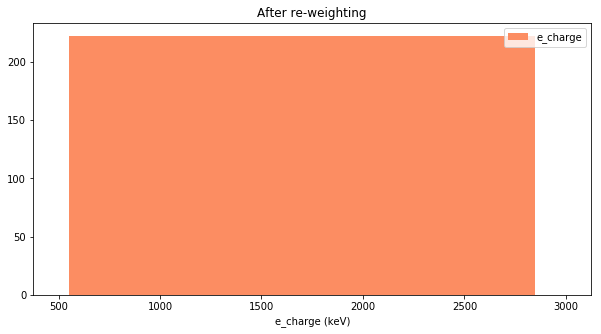

Total DD events after cuts:  4756
Total DD weight after cuts:  10000.0


In [14]:
# Histogram the data into e_charge bins, then re-weight data within each bin
ec_min=500
ec_max=3000

ec_bins = np.linspace(ec_min, ec_max, 50)
(er_area, er_bins, _) = plt.hist(df['e_charge'],bins=ec_bins, label='e_charge', color=sns.color_palette("Set2")[1])
plt.xlabel('e_charge (keV)')
plt.legend()
plt.title('Before re-weighting')
plt.savefig(graph_path + "/charge_e_before_re-weighting.png",bbox_inches = 'tight')
plt.show()
ec_ind_er = np.digitize(df['e_charge'], bins=ec_bins)-1 # have to subtract 1 due to bin indexing


# Get weights
weight_scale = n_evts_target/np.sum(1/er_area[ec_ind_er]) # scale weights to keep them of order 1
weight_er = weight_scale/er_area[ec_ind_er]

plt.figure()
plt.hist(df['e_charge'],bins=ec_bins,weights=weight_er, label='e_charge', color=sns.color_palette("Set2")[1])
plt.xlabel('e_charge (keV)')
plt.legend()
plt.title('After re-weighting')
plt.savefig(graph_path + "/charge_e_after_re-weighting.png",bbox_inches = 'tight')
plt.show()


print("Total DD events after cuts: ",len(df))

df['weight'] = weight_er

print("Total DD weight after cuts: ",np.sum(weight_er))

In [52]:
df.to_csv(data_path + "/labels_5872.csv")